In [3]:
# importando biblioteca
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")


# Configurações Iniciais

In [4]:
dt = pd.read_csv("data_version1.csv")
dt.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0


## **Dividindo base em treinamento e teste**

In [5]:
X = dt.filter(regex=r"_mean", axis=1)
X = X.drop(columns=['radius_mean', 'perimeter_mean', 'area_mean',  'concavity_mean', 'concave points_mean'])

In [6]:
X.head()

,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean
0,10.38,0.11840,0.27760,0.2419,0.07871
1,17.77,0.08474,0.07864,0.1812,0.05667
2,21.25,0.10960,0.15990,0.2069,0.05999
3,20.38,0.14250,0.28390,0.2597,0.09744
4,14.34,0.10030,0.13280,0.1809,0.05883


In [7]:
y = dt['diagnosis']

In [8]:
y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [9]:
Xtrain,  Xval, ytrain, yval = train_test_split(X, y, train_size=0.5)

In [10]:
Xtrain.shape,  Xval.shape, ytrain.shape, yval.shape

((284, 5), (285, 5), (284,), (285,))

## **Normalizando a base**

In [11]:
#Colocar os dados em escala semelhante
#Aplicar normalização em apenas uma parte do dataframe, no caso dados de treinamento.
#E após normalizar a parte de treino é preciso fazer com o de teste

scaler = MinMaxScaler()
X_treino_scaler = scaler.fit_transform(Xtrain)
X_teste_scaler = scaler.transform(Xval)
X_teste_scaler[:5]

array([[0.32422969, 0.295678  , 0.24770876, 0.3217202 , 0.15711879],
       [0.20308123, 0.26587464, 0.1181581 , 0.28143713, 0.19334457],
       [0.22408964, 0.40598116, 0.25089104, 0.41535112, 0.25631845],
       [0.37219888, 0.58316264, 0.28844196, 0.37670114, 0.3946925 ],
       [0.71428571, 0.2962925 , 0.26457485, 0.30811105, 0.14279697]])

In [12]:
## dados normalizados em dataframe
pd.DataFrame(X_teste_scaler,columns=X.columns).head()

,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean
0,0.324230,0.295678,0.247709,0.321720,0.157119
1,0.203081,0.265875,0.118158,0.281437,0.193345
2,0.224090,0.405981,0.250891,0.415351,0.256318
3,0.372199,0.583163,0.288442,0.376701,0.394693
4,0.714286,0.296293,0.264575,0.308111,0.142797


# **Modelo Regressão Logística**


A Regressão Linear funciona, por exemplo quando queremos inferir qual o preço de venda colocar em uma casa, dado um conjunto de *features*. Ou seja, queríamos fazer a previsão de um valor contínuo.

Já a Regressão Logística serve para classificar algo dentro de um conjunto de categorias. Como exemplo, podemos pegar o *dataset* de pacientes com câncer de mama.

A Regressão Logística é ideal nesse tipo de situação, de classificação, pois trabalha com probabilidades. No caso, após treinar o modelo conseguiríamos ver qual a probabilidade de um dado paciente possuir ou não o câncer de mama.

<p align=center><img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Screen-Shot-2019-10-07-at-04.53.01.png" width="50%"></p>

Pense na imagem acima como se o eixo-x fosse a idade de um paciente e o eixo y a probabilidade dele ter um câncer de mama. 

Como você vê, precisamos mapear valores para dentro de um range $[0,1]$. Para isso, usamos a função sigmóide,

$$
sigmoid(z) = \frac{1}{1 + e^{-z}}
$$

onde $z= b + w_1x_1 + w_2x_2 + \dots + w_mx_m$ é o *output* da camada linear de um modelo de regressão logística. A curva **sigmoidal** irá mapear esse valor (qualquer) para o intervalo entre 0 e 1.

A Regressão Logística é representada po

$$
\text{Log Loss} = \sum_{(x, y) \in D} -y\log(\hat{y}) - (1 -y)\log(1-\hat{y})
$$

## **Treinamento**

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_treino_scaler, ytrain)
lr.score(X_teste_scaler, yval)

0.8666666666666667

## **Avaliação do Modelo**

In [15]:
lr_scaler = LogisticRegression(random_state=0)
lr_scaler.fit(X_treino_scaler, ytrain)
lr_scaler.score(X_teste_scaler, yval)

0.8666666666666667

In [45]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,f1_score,accuracy_score

## FAZENDO PREDIÇÃO(predict) COM O ALGORITMOS DE Regressão Logística
predicao = lr.predict(Xval)
predicao

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
from sklearn.metrics import classification_report
p = lr.predict(Xval)
print (classification_report(yval, p))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50        94
           1       0.00      0.00      0.00       191

    accuracy                           0.33       285
   macro avg       0.16      0.50      0.25       285
weighted avg       0.11      0.33      0.16       285



Por causa do resultado obtido utilizando o modelo de regressão logística, foi empenhado o trabalho no próximo modelo de classificação chamado RandomForest com intuito de se obter melhores resultados estatísticos.

# RandomForest

*Decision Tree*, ou Árvore de Decisão em português, é um algoritmo de aprendizado supervisionado para *Machine Learning*, e pode ser usado tanto para classificação quanto para regressão.

Uma *Decision Tree* é construída a partir de um processo de indução, que vai dividindo os dados em subconjuntos cada vez mais puros. Para selecionar os atributos que irão compor a árvore, são considerados o grau de entropia de um nó e a informação ganha a mais após um *split*.

<p align=center>
  <img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Screen-Shot-2019-10-07-at-15.30.28-1.png" width="50%">
</p>


É percebido como a classificação vai seguindo um caminho baseado nos valores individuais de cada atributo que faz parte da *decision tree*. [Dê uma olhada neste site](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/).

O R2D3, citado no link acima, é um site muito bom para aprender visualmente como uma árvore é construída. Recomendo você dar uma olhada.

## Treinamento

In [17]:
from sklearn.ensemble import RandomForestClassifier
mdl = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
mdl.fit(Xtrain, ytrain)

RandomForestClassifier(n_jobs=1, random_state=0)

## Feature Importance 

In [18]:
#Avaliando as variáveis mais importantes para o modelo
for i in zip(X.columns, mdl.feature_importances_):
  print(i)

('texture_mean', 0.23518239903324062)
('smoothness_mean', 0.16476835866936096)
('compactness_mean', 0.34162839738156525)
('symmetry_mean', 0.09017048089268623)
('fractal_dimension_mean', 0.168250364023147)


## Avaliação do Modelo

In [19]:
## score vai de 0 a 1 (0% - 100%)
mdl.score(Xval, yval) * 100

90.17543859649123

In [20]:
## Avaliando modelo com base normalizada
mdl_scaler = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
mdl_scaler.fit(X_treino_scaler, ytrain)
mdl_scaler.score(X_teste_scaler, yval)

0.9017543859649123

In [21]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,f1_score,accuracy_score

## FAZENDO PREDIÇÃO(predict) COM O ALGORITMOS DE Árvore de Decisão
predicao = mdl.predict(Xval)
predicao

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [22]:
from sklearn.metrics import classification_report
p = mdl.predict(Xval)
print (classification_report(yval, p))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        94
           1       0.95      0.91      0.93       191

    accuracy                           0.90       285
   macro avg       0.88      0.90      0.89       285
weighted avg       0.91      0.90      0.90       285



### **Matriz de Confusão**

A matriz de confusão pode ser definida como uma representação no formato de tabela para os acertos e erros de um classificador. Nela, é sumarizada as quantidades de pontos que foram corretamente classificados e os que também não foram.

A definição que veremos abaixo da matriz de confusão é uma dentre as possíves que podem ser feitas. Alguns autores utilizam a definição "transposta". Porém, isso não faz muita diferença.

<p align=center>
  <img src="https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png" width="50%">
</p>

Se observarmos, a matriz de confusão possui duas linhas e duas colunas. As linhas são relativas aos valores verdadeiros, aqueles anotados no conjunto de dados, e as colunas são relativas aos valores previstos pelo modelo.

Antes de olhar o resultado da matrix de confusão do modelo, vamos relembrar os conceitos:

* **Verdadeiro positivo (*true positive* — TP):** Por exemplo, quando o paciente tem câncer de mama e o modelo classifica como tendo o câncer.

* **Falso positivo (*false positive* — FP):** Por exemplo, quando o paciente não tem câncer de mama e o modelo classifica como tendo o câncer.

* **Falso verdadeiro (*true negative* — TN)**: Por exemplo, quando o paciente não tem câncer de mama e o modelo classifica como não tendo o câncer.

* **Verdadeiro negativo (*false negative* — FN):** Por exemplo, quando o paciente não tem câncer de mama e o modelo classifica como não tendo o câncer.

Observando a matriz de confusão, fica claro que desejamos minimizar **FN** e **FP**, e maximizar **TP** e **TN**. 

Agora vejamos a matriz de confusão para o nosso modelo e os seus resultados

In [23]:
##MATRIZ DE CONFUSÃO DO SKLEARN
# Classe 0 teve o desempenho que corresponde aproximadamente a 90%
# Classe 1 teve o desempenho que corresponde aproximadamente a 86%

confusion_matrix(y_pred=predicao,y_true= yval)

array([[ 84,  10],
       [ 18, 173]])

<Figure size 504x504 with 0 Axes>

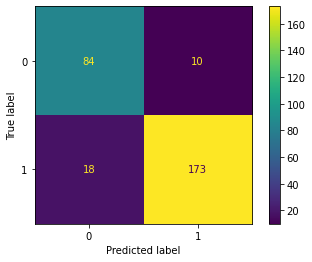

In [24]:
## PLOT MATRIZ DE CONFUSÃO DO SKLEARN
plt.figure(figsize=(7,7))
plot_confusion_matrix(mdl,Xval,yval)
plt.show()

In [25]:
## MATRIZ DE CONFUSÃO PERSONALIZADA

## calculando a matriz de confusÃo
cm = confusion_matrix(y_true=yval,y_pred=predicao)
## calculando as % de acertos e erros para a matriz de confusÃo
percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)
percent

array([[89.36170213, 10.63829787],
       [ 9.42408377, 90.57591623]])

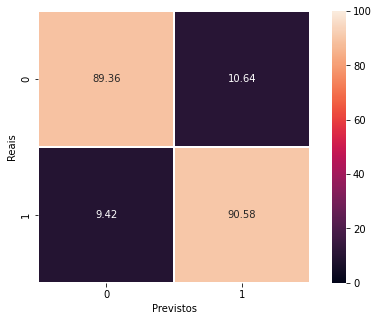

In [26]:
## MATRIZ DE CONFUSÃO PERSONALIZADA
plt.figure(figsize=(8,5))

## convertendo em dataframe
d = pd.DataFrame(percent)

## criando matriz de confusão
sns.heatmap(d, vmax=100, vmin=0, annot=True, square=True, fmt=".2f",linewidths=.5)
plt.xlabel('Previstos')
plt.ylabel('Reais')

plt.show()

In [27]:
## CALCULANDO O ACURACIA
print("ACURÁCIA: ", accuracy_score(y_pred=predicao,y_true=yval)*100)

## CALCULANDO O F-SCORE
print("F1-SCORE: ", f1_score(y_pred=predicao,y_true=yval,average='macro')*100)

ACURÁCIA:  90.17543859649123
F1-SCORE:  89.11382734912148


Acurácia é **Taxa de Acerto**

É basicamente o número de acertos (positivos) divido pelo número total de exemplos. Ela deve ser usada em datasets com proporção adequadas sendo, por exemplo o ideial 60% de uma classe e 40% de outra classe.

Em problemas com classes desproporcionais, havendo discrepância de representatividade de alguma das classe, nesse cenário algo utilizar a acurácia é passado uma falsa impressão de bom desempenho. 

Por isso que foi necessário verificar se no data frame existem dados desbalanceados. 

F1 Score é uma média harmônica entre precisão, sendo boa quando temos um conjunto de dados com classes desproporcionais, e o seu modelo não emite probabilidades. Isso não significa que não possa ser usada com modelos que emitem probabilidades, tudo depende do objetivo de sua tarefa de machine learning.

Em geral, quanto maior o F1 score, melhor.

## Interpretação do Modelo

In [31]:
!pip install shap

     |████████████████████████████████| 564 kB 5.6 MB/s 


In [32]:
import shap

In [33]:
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(Xtrain)

In [34]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], Xtrain.iloc[0,:])

Probabilidade do primeiro exemplo do data frame é de 0.14 de ter câncer de mama do tipo benigno

In [35]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][1,:], Xtrain.iloc[1,:])

Probabilidade do segundo exemplo do dataframe é de 0.99 de ter câncer de mama do tipo benigno

In [36]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], Xtrain)

Outra visão dos dados, utilizando a opção **compactness_mean** percebe-se que a concavidade varia de 0.02 à 0.28, visto que quando a concavidade passa de 0.1 é visto que o modelo decidiu que os exemplos tem bem menoschance do câncer ser beligno. Já com concavidade  entre 0.02 e 0.09 o modelo informa que o exemplos tem mais chance de ser beligno. 

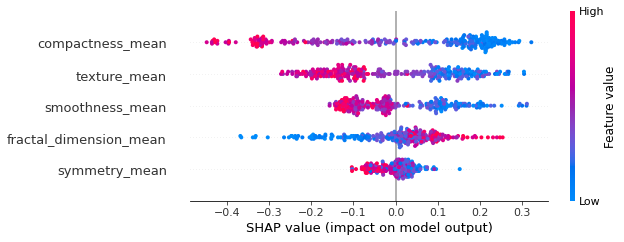

In [37]:
shap.initjs()
shap.summary_plot(shap_values[1], Xtrain)

O summary informa quais as features mais importantes. Nesse gráfico o **compactness_mean** é a featura mais importante para determinar se o câncer é benigno ou maligno. Majoritariamente o gráfico mostra que quando o impacto no modelo aumenta, ele dizer que o câncer tem mais chance de ser maligno, por exemplo: o impacto do modelo está em **0.2** é quando o valor correspondente ao **compactness_mean** é baixo, então o modelo vai tender a dizer que o câncer tem mais chance de ser maligno. Mas quando o valor do **compactness_mean** é alto, o modelo tende a baixar o impacto, ou seja, tende a dizer que o exemplo tem menos chance de ser maligno, pois o impacto do modelo passa a ser aproximadamente **-0.4**

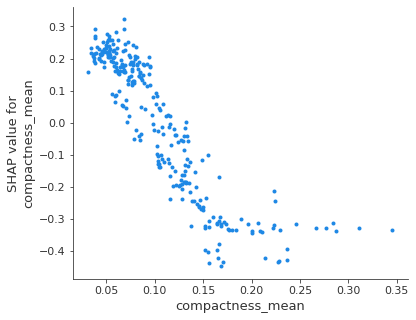

In [38]:
shap.initjs()
shap.dependence_plot("compactness_mean",shap_values[1], Xtrain, interaction_index=None)

Quando o valor do **compactness_mean** é menor que **0.06**, o modelo tende a dizer que o exemplo tem mais certeza de que o exemplo seja câncer do tipo maligno. Mas quando o valor de **compactness_mean** passa de **0.10**, o modelo tende a ter menos certeza que o câncer seja do tipo maligno.

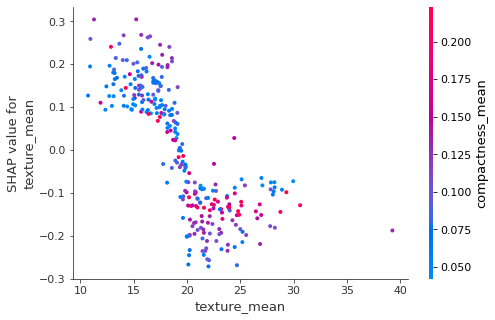

In [39]:
shap.initjs()
shap.dependence_plot("texture_mean",shap_values[1], Xtrain, interaction_index="compactness_mean")

Como as outras variáveis interagem com a feature mais importante do modelo para realizar previsão?



Percebe-se que tanto **texture_mean** quanto **compactness_mean** tem valores baixos em exemplos em que o modelo atribui uma maior probabilidade de serem exemplos belignos. Já quando **texture_mean** cresce, o modelo ainda considera que possa existir a chance de ser câncer do tipo maligno, mas não é com apresenta com veemência.

## Salvando o Modelo em Produção

In [43]:
import joblib as jb

modelo = mdl
description='modelo de RandomForestClassifier para classificar qual o tipo de câncer de mama de determinado paciente. \
Foram utilizadas as seguintes colunas: ' + " ','".join(X.columns)
date='11/04/2022'
version='0.1'
name_model='classificacao_cancer_mama'
metrics = 'acc: 88.42105263157895 e f1socre: 87.98988621997472'

dic_save_model = dict({
    'model': modelo,
    'metadata': {
        'description': description,
        'author': 'William Silva',
        'date': date,
        'source_code_version': version,
        'metrics': metrics
    }
})
dic_save_model

{'metadata': {'author': 'William Silva',
  'date': '11/04/2022',
  'description': "modelo de RandomForestClassifier para classificar qual o tipo de câncer de mama de determinado paciente. Foram utilizadas as seguintes colunas: texture_mean ','smoothness_mean ','compactness_mean ','symmetry_mean ','fractal_dimension_mean",
  'metrics': 'acc: 88.42105263157895 e f1socre: 87.98988621997472',
  'source_code_version': '0.1'},
 'model': RandomForestClassifier(n_jobs=1, random_state=0)}

In [44]:
jb.dump(dic_save_model, name_model+'.joblib')

['classificacao_cancer_mama.joblib']